
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining potfolios comprised of generic asset classes and asset subclasses.  Construct portfolios of generic asset classes and examine the results of different weighting schemes.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

# do not truncate column names
pd.set_option('display.max_colwidth', None)

%matplotlib inline

In [3]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['asset-class-galaxy']

In [5]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate=0, annual_returns='5 Yr', standard_deviation='SD 5 Yr')
df = df.drop('Description', axis=1)
df

,Investment Option,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,SD 1 Yr,SD 3 Yr,SD 5 Yr,Annual Returns,Std Dev,Sharpe Ratio
0,US Stocks,US Stocks,3.42,-23.00,13.57,11.54,15.78,46.29,24.36,11.06,16.65,16.37,15.78,16.37,0.96
1,Global Stocks,Global Stocks,62.86,31.40,14.02,8.92,11.03,38.49,22.74,8.19,15.98,15.09,11.03,15.09,0.73
2,US Bonds,US Bonds,-6.83,7.70,6.83,1.40,-0.91,7.45,5.37,4.91,7.33,6.36,-0.91,6.36,-5.79
3,Global Bonds,Global Bonds,13.38,3.90,6.32,2.28,0.09,3.91,2.08,3.62,5.95,5.25,0.09,5.25,0.02
4,Cash Equivalents,Cash Equivalents,4.45,4.27,4.86,4.31,2.55,0.24,0.00,0.35,0.40,0.68,2.55,0.68,3.75
5,Real Estate,Real Estate,-17.18,0.36,17.35,-1.74,7.43,34.10,20.19,14.90,20.57,19.24,7.43,19.24,0.39
6,Commodities,Commodities,-64.85,-20.28,-6.31,-5.68,17.04,24.42,15.41,10.31,12.13,15.60,17.04,15.60,1.09
7,Currencies,Currencies,-32.60,-24.26,-0.72,3.91,2.67,11.84,8.25,7.66,7.65,7.26,2.67,7.26,0.37
8,Managed Futures,Managed Futures,-66.29,-14.30,4.54,8.49,8.49,15.05,11.47,10.08,16.06,16.29,8.49,16.29,0.52
9,Balanced,Balanced,6.47,2.74,9.97,5.62,5.45,19.12,10.62,5.08,9.75,8.90,5.45,8.90,0.61


In [6]:
# Rank
rank = bb.rank(df, rank_by='Sharpe Ratio', group_by='Asset Class', num_per_group=3)
rank

,Investment Option,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,SD 1 Yr,SD 3 Yr,SD 5 Yr,Annual Returns,Std Dev,Sharpe Ratio
15,US Stocks:Growth and Income,US Stocks:Growth and Income,4.24,-20.48,14.36,12.43,16.43,45.37,23.93,10.21,16.15,15.93,16.43,15.93,1.03
11,US Stocks:Large Cap,US Stocks:Large Cap,4.87,-20.39,14.34,12.38,16.36,49.73,25.70,10.23,16.16,15.93,16.36,15.93,1.03
23,US Stocks:Technology,US Stocks:Technology,49.00,-21.88,11.13,16.11,20.69,61.76,29.31,13.94,21.61,21.01,20.69,21.01,0.98
37,US Bonds:Treasury Bills (T-bills),US Bonds:Treasury Bills (T-bills),4.45,4.27,4.86,4.31,2.55,0.24,0.00,0.35,0.40,0.68,2.55,0.68,3.75
35,US Bonds:High Yield,US Bonds:High Yield,-1.24,-0.27,8.78,5.51,5.50,14.30,7.99,3.91,9.13,8.24,5.50,8.24,0.67
36,US Bonds:Preferred Stock,US Bonds:Preferred Stock,-10.63,-11.86,4.26,2.43,3.21,17.31,9.71,6.65,12.25,11.16,3.21,11.16,0.29
10,Risk-Free Asset,Risk-Free Asset,4.45,4.27,4.86,4.31,2.55,0.24,0.00,0.35,0.40,0.68,2.55,0.68,3.75
5,Real Estate,Real Estate,-17.18,0.36,17.35,-1.74,7.43,34.10,20.19,14.90,20.57,19.24,7.43,19.24,0.39
48,Real Estate:Real Estate Funds,Real Estate:Real Estate Funds,-17.18,0.36,17.35,-1.74,7.43,34.10,20.19,14.90,20.57,19.24,7.43,19.24,0.39
47,Real Estate:REIT,Real Estate:REIT,-14.63,2.11,17.90,-1.16,7.36,34.08,20.31,14.63,20.35,19.07,7.36,19.07,0.39


### Sample Portfolios
Format 'Investment option': weight

In [7]:
# Put your "age" in bonds and the rest in stocks
age_portfolio = {
    'Title': 'Age Portfolio',
    'US Stocks': 0.50,
    'US Bonds': 0.50
}

# Put your "age" in Short Term Treasuries and the rest in stocks
age2_portfolio = {
    'Title': 'Age2 Portfolio',
    'US Stocks': 0.50,
    'Cash Equivalents:Treasury Bills (T-bills)': 0.50
}

# Top Dogs - top performer by sharpe ratio in each Asset Class, equal weights
top_dog_portfolio = {
    'Title': 'Top Dog Portfolio',
    'US Stocks:Technology': 1/10,
    'US Bonds:Treasury Inflation-Protected Securities (TIPS)': 1/10,
    'Risk-Free Asset': 1/10,
    'Real Estate:REIT': 1/10,
    'Global Stocks:Emerging Markets': 1/10,
    'Global Bonds': 1/10,
    'Currencies:Chinese Yuan': 1/10,
    'Commodities:Palladium': 1/10,
    'Cash Equivalents': 1/10,
    'Balanced:Conservative Allocation (30/70)': 1/10
}

# 50% S&P 500, 50% bonds
fifty_fifty_portfolio = {
    'Title': 'Fifty Fifty Portfolio',
    'US Stocks': 1/2,
    'US Bonds': 1/2
}

# 1/3 S&P 500, 1/3 bonds, 1/3 fixed income
thirds_portfolio = {
    'Title': 'Thirds Portfolio',
    'US Stocks:Large Cap': 1/3,
    'US Bonds': 1/3,
    'US Bonds:Investment Grade': 1/3
}

# Dave Ramsey: 25% Growth and income, 25% Growth, 25% Aggressive growth, 25% International
dave_ramsey_portfolio = {
    'Title': 'Dave Ramsey Portfolio',
    'US Stocks:Large Cap': 1/4,
    'US Stocks:Growth': 1/4,
    'US Stocks:Technology': 1/4,
    'Global Stocks': 1/4 
}

# Warren Buffett Retirement Fund: 90% S&P500, 10% Short Term Treasuries (sub General Account)
warren_buffett_portfolio = {
    'Title': 'Warren Buffet Portfolio',
    'US Stocks:Large Cap': 0.90,
    'Cash Equivalents:Treasury Bills (T-bills)': 0.10
}

# Janet Yellen: 50% fixed income, 40% S&P500, 10% cash
janet_yellen_portfolio = {
    'Title': 'Janet Yellen Portfolio',
    'US Bonds:Investment Grade': 0.50,
    'US Stocks:Large Cap': 0.40,
    'Cash Equivalents:Money Markets': 0.10
}

# Risk Off: 100% fixed income divided between risk free asset, bond fund, and money market 
risk_off_portfolio = {
    'Title': 'Risk Off Portfolio',
    'Cash Equivalents:Treasury Bills (T-bills)': 1/3,
    'US Bonds': 1/3,
    'Cash Equivalents:Money Markets': 1/3
}

# Risk On: 100% US stocks bevided between large, emerging markets, and small cap
risk_on_portfolio = {
    'Title': 'Risk On Portfolio',
    'US Stocks:Large Cap': 1/3,
    'Global Stocks:Emerging Markets':1/3,
    'US Stocks:Small Cap': 1/3
}

# Everything Ranked
ranked_portfolio = {
    'Title': 'Ranked Portfolio'
}
everything = list(rank['Investment Option'])
ranked_portfolio.update(dict.fromkeys(everything, 1/len(everything)))

### Custom Portfolios

In [8]:
# My portfolio
my_portfolio = {
    'Title': 'My Portfolio',
    'US Stocks:Technology': 1/8,
    'US Stocks:Growth': 1/8,
    'Real Estate:REIT': 1/8,
    'Currencies:Japanese Yen': 1/8,
    'Currencies:Chinese Yuan': 1/8,
    'US Bonds': 1/8,
    'US Bonds:Investment Grade': 1/8,
    'US Bonds:High Yield': 1/8
}

### Choose Portfolio Option

In [9]:
# Select one of the portfolios from above
portfolio_option = age_portfolio

In [10]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()

### Analysis Options

In [11]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': 'Equal',
                          'US Stocks': 1/2},
    'Asset Subclass':    {'weight_by': None,
                          'US Bonds:High Yield': 1/2},
    'Investment Option': {'weight_by': 'Sharpe Ratio'},
}
weight_by = None

In [12]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,US Stocks,US Bonds,Age Portfolio
Annual Returns,15.78,-0.91,7.43
Std Dev,16.37,6.36,9.10
Sharpe Ratio,0.96,-5.79,0.82
Weight,0.50,0.50,1.00
Worst Typical Down Year,-16.96,-13.63,-10.77
Black Swan,-33.33,-19.99,-19.87


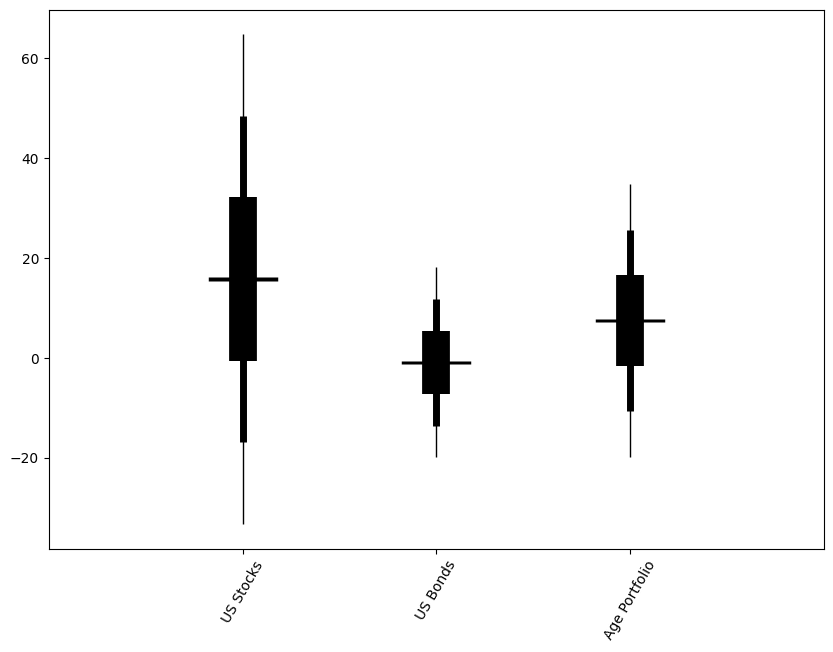

In [13]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

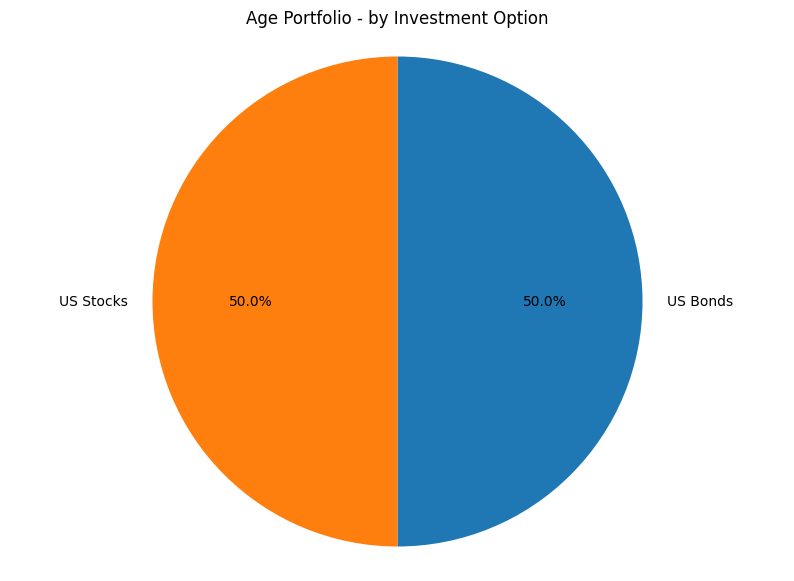

US Bonds    0.50
US Stocks   0.50



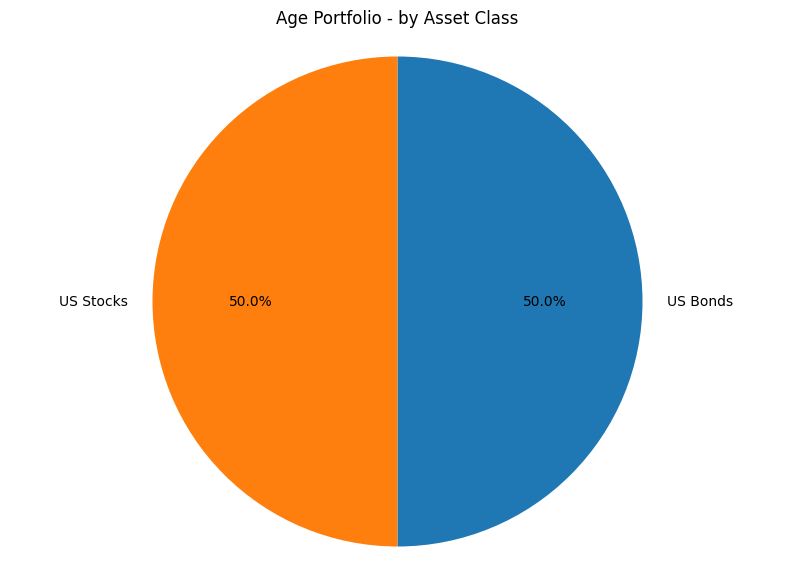

US Bonds    0.50
US Stocks   0.50



In [14]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option', 'Asset Class'])

In [15]:
# Show exact weights
bb.print_portfolio(portfolio_option)

Age Portfolio Weights:
    US Stocks                      0.5000
    US Bonds                       0.5000


### Optimize Portfolio

In [16]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = False

In [17]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': None
}
'''

constraints = {
    'Annual Return': 6,
    'Worst Typical Down Year': None,
    'Black Swan': -20
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).